In [4]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import numpy as np
import math
import cv2
from numpy.matrixlib.defmatrix import matrix

WHITE = 255
BLACK = 0


In [5]:



def CCL(image):
    q = []
    image_x,image_y = image.shape
    labels = np.zeros((image_x,image_y))
    print(labels)
    label = 1
    print(image_x,image_y)
    for i in range(image_x):
        for j in range(image_y):
            if (image[i][j] == WHITE and labels[i][j] == 0):
                labels[i][j] = label
                q.append((i,j))
                if q != []:
                    while(q != []): 
                        x,y = q.pop(0)
                        #print("Finding neighbors")
                        #print(x,y)
                        for a in range(-1,2):
                            for b in range(-1,2):
                                if  0 <= (x + a ) < image_x and 0 <= (y+b) < image_y:
                                    #print(x+a, y+b)
                                    if (image[x+a][y+b] == WHITE and labels[x+a][y+b] == 0):
                                        labels[x+a][y+b] = label
                                        q.append((x+a,y+b))
                label = label + 1
    print(label)
    return labels

            

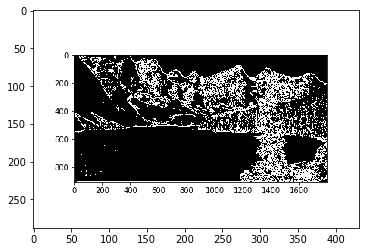

In [6]:
binary = cv2.imread("./images/binary.png")
plt.imshow(binary,cmap='gray', vmin=0,vmax=255)

In [7]:
img = cv2.imread("./images/Q6.png", cv2.IMREAD_GRAYSCALE)
    


NameError: name 'imshow' is not defined

In [14]:
labels = CCL(img)
print(labels[labels==1])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
205 269
1
[]


In [87]:
print(labels)
print(labels.max())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0


&lt;matplotlib.image.AxesImage at 0x12883ab50&gt;

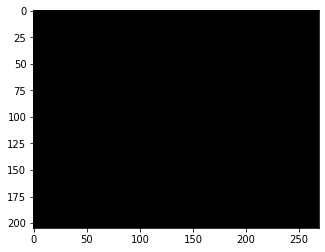

In [88]:
plt.imshow(labels,cmap='gray', vmin=0,vmax=255)


In [2]:



def CCL_thresh(image,threshold):
    q = []
    image_x,image_y = image.shape
    labels = np.zeros((image_x,image_y))
    label = 1
    for i in range(image_x):
        for j in range(image_y):
            if (image[i][j] > threshold and labels[i][j] == 0):
                labels[i][j] = label
                q.append((i,j))
                if q != []:
                    while(q != []): 
                        x,y = q.pop(0)
                        #print("Finding neighbors")
                        #print(x,y)
                        for a in range(-1,2):
                            for b in range(-1,2):
                                if  0 <= (x + a ) < image_x and 0 <= (y+b) < image_y:
                                    #print(x+a, y+b)
                                    if (image[x+a][y+b] > threshold and labels[x+a][y+b] == 0):
                                        labels[x+a][y+b] = label
                                        q.append((x+a,y+b))
                label = label + 1
    
    return labels

            

In [3]:
c = CCL_thresh(img, 11)
print(c.max())

NameError: name 'img' is not defined

In [1]:
distribution = []
i_list = []
iteration = []
for i in range(0,255):
    k = CCL_thresh(img, i)
    i_list.append(i)
    iteration.append(i)
    distribution.append(k.max())
    

#I modified the function so that it takes in a threshold on the foreground pixel values, and performs a sweep from 0 to 255. In the sweep we find that there are a lot of repeated 

NameError: name 'CCL_thresh' is not defined

(array([5., 0., 2., 2., 2., 1., 0., 1., 0., 1., 2., 0., 1., 0., 2., 0., 1.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 2., 5., 9., 4., 3.,
        1., 0., 2., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 98 Patch objects>)

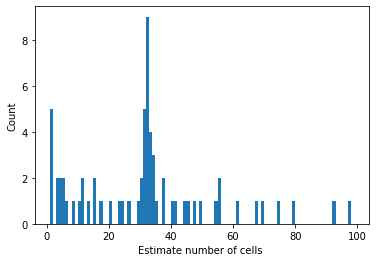

In [65]:

plt.xlabel("Estimate number of cells ")
plt.ylabel("Count")
plt.hist(distribution, range(1,100))



(array([5., 0., 2., 2., 2., 1., 0., 1., 0., 1., 2., 0., 1., 0., 2., 0., 1.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 2., 5., 9., 4., 3.,
        1., 0., 2., 0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]),
 <a list of 38 Patch objects>)

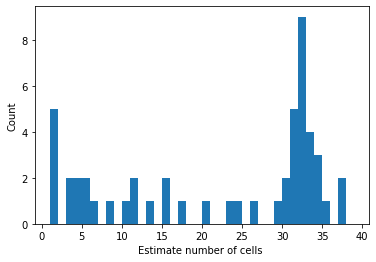

In [67]:

plt.xlabel("Estimate number of cells ")
plt.ylabel("Count")
plt.hist(distribution, range(1,40))

In [ ]:
#Based on this we find that there are inbetween 30-35 cells in that photo.

(array([[3., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [3., 0., 0., ..., 0., 0., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        [3., 0., 0., ..., 0., 0., 0.]]),
 array([ 0.   ,  2.475,  4.95 ,  7.425,  9.9  , 12.375, 14.85 , 17.325,
        19.8  , 22.275, 24.75 , 27.225, 29.7  , 32.175, 34.65 , 37.125,
        39.6  , 42.075, 44.55 , 47.025, 49.5  , 51.975, 54.45 , 56.925,
        59.4  , 61.875, 64.35 , 66.825, 69.3  , 71.775, 74.25 , 76.725,
        79.2  , 81.675, 84.15 , 86.625, 89.1  , 91.575, 94.05 , 96.525,
        99.   ]),
 array([  0.  ,   6.95,  13.9 ,  20.85,  27.8 ,  34.75,  41.7 ,  48.65,
         55.6 ,  62.55,  69.5 ,  76.45,  83.4 ,  90.35,  97.3 , 104.25,
        111.2 , 118.15, 125.1 , 132.05, 139.  , 145.95, 152.9 , 159.85,
        166.8 , 173.75, 180.7 , 187.65, 194.6 , 201.55, 208.5 , 215.45,
        222.4 , 229.35, 236.3 , 243.25, 250.2 , 257.15, 264.1 , 271.05,
        278. 

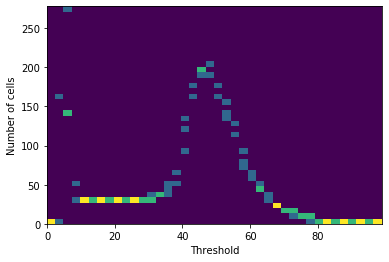

In [69]:
plt.xlabel("Threshold")
plt.ylabel("Number of cells")
plt.hist2d(i_list,distribution,bins=[40,40])